In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [10]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns={'Price'})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = boston.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = boston.feature_names)

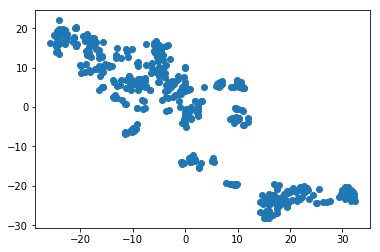

In [12]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [13]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

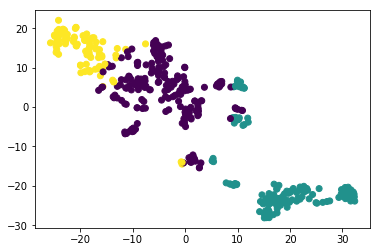

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [15]:
DF = pd.DataFrame({'Cluster': labels_train,'CRIM': X_train['CRIM'], 'Price': y_train['Price']})

DF.groupby('Cluster').agg({'CRIM': 'mean', 'Price': 'mean'})

CRIM      Price
Cluster                      
0         0.420986  24.971204
1        10.637094  16.179688
2         0.072118  27.874118

* Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [16]:
test_labels = kmeans.fit_predict(X_test_scaled)
DFT = pd.DataFrame({'Cluster': test_labels, 'CRIM': X_test['CRIM'], 'Price': y_test['Price']})
DFT.groupby('Cluster').agg({'CRIM': 'mean', 'Price': 'mean'})

CRIM      Price
Cluster                     
0        0.083085  34.553846
1        9.419182  16.710526
2        0.222501  21.717647